Accuracy: Train 95.00%, Test 57.50%, k: 2
Accuracy: Train 96.25%, Test 57.50%, k: 3
Accuracy: Train 96.25%, Test 57.50%, k: 4
Accuracy: Train 93.12%, Test 57.50%, k: 5
Accuracy: Train 90.62%, Test 57.50%, k: 6
Accuracy: Train 83.75%, Test 55.00%, k: 7
Accuracy: Train 83.12%, Test 55.00%, k: 8
Accuracy: Train 81.25%, Test 52.50%, k: 9


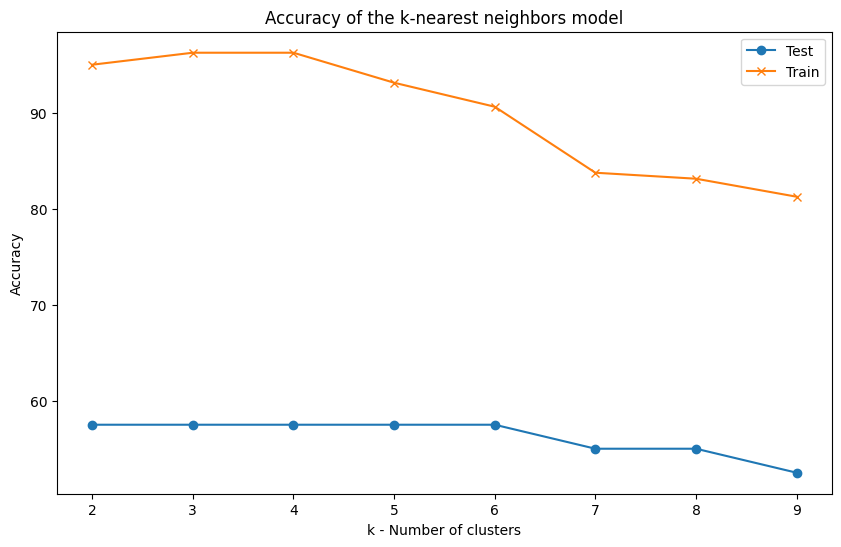

In [3]:
from cv2 import ml
from numpy import sum
import numpy as np
from matplotlib.pyplot import savefig, figure, plot, show, title, xlabel, ylabel, legend

npaClassifications = np.loadtxt("classifications.txt", np.float32)
npaFlattenedImages = np.loadtxt("flattened_images.txt", np.float32)
npaClassifications = npaClassifications.reshape((npaClassifications.size, 1))


valClassifications = np.loadtxt("classifications_val.txt", np.float32)
valFlattenedImages = np.loadtxt("flattened_images_val.txt", np.float32)
valClassifications = valClassifications.reshape((valClassifications.size, 1))


# Initiate a kNN classifier and train it on the training data
knn = ml.KNearest_create()
knn.train(npaFlattenedImages, ml.ROW_SAMPLE, npaClassifications)

# Initiate a dictionary to hold the ratio and accuracy values
accuracy_dict = {}
train_accuracy_dict = {}

# Populate the dictionary with the keys corresponding to the values of 'k'
keys = range(2, 10)

for k in keys:
    
    train_ret, train_result, train_neighbours, dist = knn.findNearest(npaFlattenedImages, k)
    train_accuracy = (sum(train_result == npaClassifications) / npaClassifications.size) * 100

    # Test the kNN classifier on the testing data
    ret, result, neighbours, dist = knn.findNearest(valFlattenedImages, k)

    # Compute the accuracy and print it
    accuracy = (sum(result == valClassifications) / valClassifications.size) * 100
    print("Accuracy: Train {:.2f}%, Test {:.2f}%, k: {}".format(train_accuracy, accuracy, str(k)))

    # Populate the dictionary with the values corresponding to the accuracy
    accuracy_dict[k] = accuracy
    train_accuracy_dict[k] = train_accuracy

# Plot the accuracy values against the value of 'k'
figure(figsize=(10,6))
plot(accuracy_dict.keys(), accuracy_dict.values(), marker='o', label="Test")
plot(train_accuracy_dict.keys(), train_accuracy_dict.values(), marker='x', label="Train")
title('Accuracy of the k-nearest neighbors model')
xlabel('k - Number of clusters')
ylabel('Accuracy')
legend(loc='upper right')
savefig("TrainResult.png")
show()
